# Lab session 4: R notebook

# Question 1

    x  y
1  10 25
2  12 24
3  14 22
4  16 20
5  18 19
6  20 17
7  22 13
8  24 12
9  26 11
10 28 10


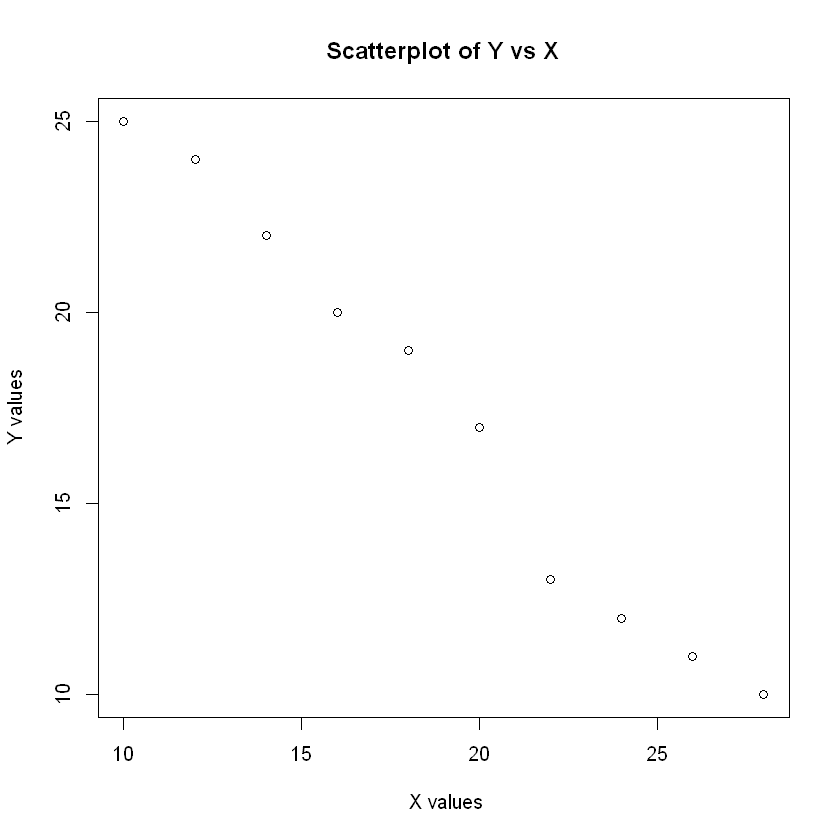

In [13]:
library(tidyverse)
df <- data.frame(x = c(10,12,14,16,18,20,22,24,26,28),
                y= c(25,24,22,20,19,17,13,12,11,10))

with(df, plot(x,y,
                main="Scatterplot of Y vs X",
                     xlab=" X values",
                     ylab="Y values"))
print(df)

In [15]:
summary(df)

       x              y        
 Min.   :10.0   Min.   :10.00  
 1st Qu.:14.5   1st Qu.:12.25  
 Median :19.0   Median :18.00  
 Mean   :19.0   Mean   :17.30  
 3rd Qu.:23.5   3rd Qu.:21.50  
 Max.   :28.0   Max.   :25.00  

In [18]:
#b)
# Note that method="pearson" to get the correlation coefficient r.
# Also, note that the use="complete.obs" option tells r to only look
# at complete cases, and ignore any missing values
r <- cor(df$x, df$y,method="pearson",use="complete.obs")
paste('correlation coeff:',r)

Rsqr <- r^2
paste('Rsquare vale is: ',Rsqr)

# Regression Model
lmodel <- lm(df$y~df$x)
summary(lmodel)

[1] "correlation coeff: -0.990560520939191"

[1] "Rsquare vale is:  0.981210145643322"


Call:
lm(formula = df$y ~ df$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5818 -0.3454  0.1061  0.5439  0.8546 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.51515    0.87992   39.23 1.96e-10 ***
df$x        -0.90606    0.04433  -20.44 3.43e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8053 on 8 degrees of freedom
Multiple R-squared:  0.9812,	Adjusted R-squared:  0.9789 
F-statistic: 417.8 on 1 and 8 DF,  p-value: 3.434e-08


### QUestion 2

In [5]:
library("readxl")
# read the data from the excel spreadsheet

Lab4data <- read_excel("MATPMD1LabSession4Data.xlsx") # attach this argument to select column and remove null values ffrom it [range = "G1:H11"]

# see what the column names in the data are
colnames(Lab4data)

# tell R that we want to use the column names as variable names 
# to access the data. Note that at the end of your session use the 
# detach(Lab3Data) command to remove these variable names.
attach(Lab4data)

[1] "Q1Group"   "Q1Correct" "Q2Strain"  "Q2Days"    "Q3Group"   "Q3BPFall" 
 [7] "Q1x"       "Q1y"       "Q4Group"   "Q4Correct" "Q2Process" "Q2Life"

The following objects are masked from Lab4data (pos = 3):

    Q1x, Q1y


The following objects are masked from Lab3data:

    Q1x, Q1y




In [6]:
View(Lab4data)

Q1Group,Q1Correct,Q2Strain,Q2Days,Q3Group,Q3BPFall,Q1x,Q1y,Q4Group,Q4Correct,Q2Process,Q2Life
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,9D,3,Group1,10.5,10,25,1,9,25,2005
1,8,9D,4,Group1,8.5,12,24,1,8,27,2157
1,8,9D,6,Group1,6.2,14,22,1,8,25,2347
1,9,9D,5,Group1,9.5,16,20,1,9,26,2239
1,7,9D,2,Group2,9.7,18,19,1,7,31,2889
1,7,9D,4,Group2,11.4,20,17,1,7,30,2942
2,2,9D,4,Group2,9.2,22,13,2,2,32,3048
2,5,9D,3,Group2,8.6,24,12,2,5,29,3002
2,4,9D,5,Group3,3.2,26,11,2,4,30,2943


In [2]:
reg <- data.frame(x = c(6.0,1.4,5.0,1.0,1.2,1.5,3.5,1.3,2.1,1.3),
                y= c(42.1,6.3,38.5,-0.3,3.6,7.8,24.4,2.1,17.5,7.5))


ERROR: Error in eval(expr, envir, enclos): object 'x' not found


In [7]:
reg
reg.lm <- lm(reg$y~reg$x)

x,y
<dbl>,<dbl>
6.0,42.1
1.4,6.3
5.0,38.5
1.0,-0.3
1.2,3.6
1.5,7.8
3.5,24.4
1.3,2.1
2.1,17.5


In [8]:
summary(reg.lm)


Call:
lm(formula = reg$y ~ reg$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3422 -2.4161  0.2317  1.6133  5.3266 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.4960     1.6113  -3.411  0.00921 ** 
reg$x         8.4140     0.5441  15.463 3.04e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.912 on 8 degrees of freedom
Multiple R-squared:  0.9676,	Adjusted R-squared:  0.9636 
F-statistic: 239.1 on 1 and 8 DF,  p-value: 3.044e-07


In [11]:
-5.4960+8.4140*(2)

[1] 11.332